(50%) Bank of LAiMM wants to predict who are possible defaulters for the consumer loans
product. They have data about historic customer behavior based on what they have observed.
Hence when they acquire new customers, they want to predict who is riskier and who is not. You
are required to use the training dataset to identify patterns that predict “potential” defaulters. Use
Support Vector Machine to identify possible defaulters. There are some hyperparameters that can
be adjusted in Support Vector Machine. These hyperparameters affect the results of training.

In [1]:
#Impoort library
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #預測準確率
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split #資料切割的模組
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#讓pandas讀取csv檔並畫出表格,確認檔按是否被讀
dataset_df = pd.read_csv('training.csv') 
cols = ['Income','Age','Experience','Married/Single','CURRENT_JOB_YRS','Risk_Flag'] #選取需要的資料
dataset_df

,Id,Income,Age,Experience,Married/Single,CURRENT_JOB_YRS,Risk_Flag
0,81157,8451099,70,4,single,4,1
1,59951,893955,28,8,married,3,0
2,246987,7023996,34,15,single,5,1
3,231215,7480946,44,10,single,10,1
4,88820,291391,33,8,single,6,1
...,...,...,...,...,...,...,...
12995,196000,6036428,34,7,single,6,1
12996,95006,7757947,62,5,single,4,0
12997,93040,6894008,66,3,married,3,1
12998,151805,6389669,33,13,married,11,0


In [4]:
# 將 single 轉成 0, married 轉成 1
dataset_df["Married/Single"].replace("single", 0, inplace=True)
dataset_df["Married/Single"].replace("married", 1, inplace=True)
dataset_df

,Id,Income,Age,Experience,Married/Single,CURRENT_JOB_YRS,Risk_Flag
0,81157,8451099,70,4,0,4,1
1,59951,893955,28,8,1,3,0
2,246987,7023996,34,15,0,5,1
3,231215,7480946,44,10,0,10,1
4,88820,291391,33,8,0,6,1
...,...,...,...,...,...,...,...
12995,196000,6036428,34,7,0,6,1
12996,95006,7757947,62,5,0,4,0
12997,93040,6894008,66,3,1,3,1
12998,151805,6389669,33,13,1,11,0


In [5]:
#將資料進行切割，分成要進行訓練的資料及
x = dataset_df.drop(['Id','Risk_Flag'], axis=1) #drop函數要記得給axis參數，因為它的預設參數是0，但我們這邊是要拿掉欄位，所以要記得給axis = 1
y = dataset_df['Risk_Flag']


#將資料再各分一半
#random_state=0或沒填時，得到的隨機陣列每次都會不一樣。
#test_size：樣本佔比，如果是整數的話就是樣本的數量，要在0~1之間
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.27)

# GridSearchCV

(a) Use GridSearchCV to search for best hyperparameters and select the parameters and set range
of values to be searched. Please report training history, parameters and range of values, confusion
matrix and accuracy. Please note that the number of possible combinations of parameters affects
the search time, the more combinations will consume more time, especially when using
GridSearchCV.

GridSearchCV 函數會自動作Cross Validation，並且統計準確率的平均數/標準差，幫我們找出最佳參數組合

In [6]:
#調整參數C, gamma
parameters = {'kernel': ['rbf'], 'C': [1, 27, 57], 'gamma': [0.07,  0.527, 1],}
#建立SVC模型，試著找出最佳參數
grid = GridSearchCV(SVC(), parameters, cv=2)
#將訓練資料放入GridSearchCV之中
grid_search = grid.fit(x_train, y_train)

#對結果打分
print(grid_search.best_score_)
print(grid_search.best_estimator_)
#印出最佳參數
print(grid.best_params_)

0.7463378509729777
SVC(C=1, gamma=0.07)
{'C': 1, 'gamma': 0.07, 'kernel': 'rbf'}


In [7]:
# Predict the labels for `x_test`
y_model= grid.predict(x_test)
accuracy_score(y_test, y_model) 

0.8023355169467388

Text(52.5, 0.5, 'predicted label')

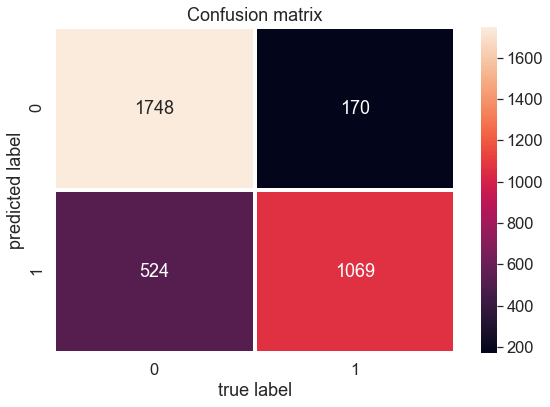

In [8]:
import seaborn as sns
sns.set(font_scale= 1.5) #利用font_scale調整字體大小
f,ax=plt.subplots(figsize=(9, 6))# 繪製顯示數值的熱圖, figsize可以調整圖案大小
cf_matrix = confusion_matrix(y_test,y_model) #將test_label&prediction放入cf_matrix中
sns.heatmap(cf_matrix, annot=True, linewidths=3,fmt='g')
#cmap 可以選擇圖的顏色
#annot annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字
#linewidth可以調整各個方塊的邊框寬度
#fmt='g'可以顯示完整數字
ax.set_title('Confusion matrix') #設定標題名稱
ax.set_xlabel('true label') #x軸名稱
ax.set_ylabel('predicted label') #y軸名稱

# RandomizedSearchCV


(b) RandomizedSearchCV to search for best hyperparameters and select the parameters and set
range of values to be searched. Please report training history, parameters and range of values,
confusion matrix and accuracy.

In [12]:
#調整參數C, gamma
parameters = {'kernel': ['rbf'], 'C': [1, 5,10], 'gamma': [0.52,  0.7, 1],}
#建立SVC模型，試著找出最佳參數
Rand = RandomizedSearchCV(SVC(), parameters, cv=2)
#將訓練資料放入GridSearchCV之中
Rand_search = Rand.fit(x_train, y_train)

#對結果打分
print(Rand_search.best_score_)
print(Rand_search.best_estimator_)
#印出最佳參數
print(Rand.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7463378509729777
SVC(C=1, gamma=0.52)
{'kernel': 'rbf', 'gamma': 0.52, 'C': 1}


In [13]:
# Predict the labels for `x_test`
y_model= Rand.predict(x_test)
accuracy_score(y_test, y_model) 

0.8023355169467388

Text(52.5, 0.5, 'predicted label')

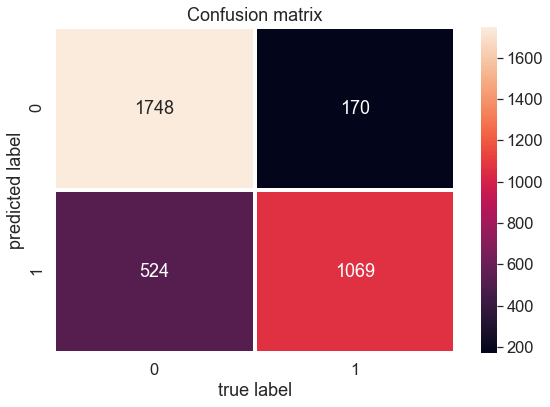

In [14]:
import seaborn as sns
sns.set(font_scale= 1.5) #利用font_scale調整字體大小
f,ax=plt.subplots(figsize=(9, 6))# 繪製顯示數值的熱圖, figsize可以調整圖案大小
cf_matrix = confusion_matrix(y_test,y_model) #將test_label&prediction放入cf_matrix中
sns.heatmap(cf_matrix, annot=True, linewidths=3,fmt='g')
#cmap 可以選擇圖的顏色
#annot annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字
#linewidth可以調整各個方塊的邊框寬度
#fmt='g'可以顯示完整數字
ax.set_title('Confusion matrix') #設定標題名稱
ax.set_xlabel('true label') #x軸名稱
ax.set_ylabel('predicted label') #y軸名稱

因為在寫功課的時候遇到很多很多的瓶頸，所以把助教跟上課影片看了很多次，還有上網搜尋相關的資料，
為了避免自己以後忘記，所以放上自己的參考資料:
1.https://medium.com/%E5%B1%95%E9%96%8B%E6%95%B8%E6%93%9A%E4%BA%BA%E7%94%9F/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%85%A5%E9%96%80-%E4%BA%8C-bbc8414d4632
2. https://iter01.com/522027.html  
3. https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
官方:https://scikit-learn.org/stable/modules/svm.html?highlight=break_ties#
4.名稱https://blog.csdn.net/u012969412/article/details/72973055